# Kaggle Competition: Customer_Churn_Prediction_2020

### Content
This competition is about predicting whether a customer will change telecommunications provider, something known as "churning".
The submissions will be evaluated using the test Accuracy criterion.

In [1]:
# Import libraries

from my_lib import *
from eda_tdg import *

# Data loading

In [2]:
df_raw = pd.read_csv('train.csv') # training data
df = df_raw.copy()

X = df.drop('churn', axis=1)
y = df['churn'] # churn rate
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Data preprocessing

### Data Visualization

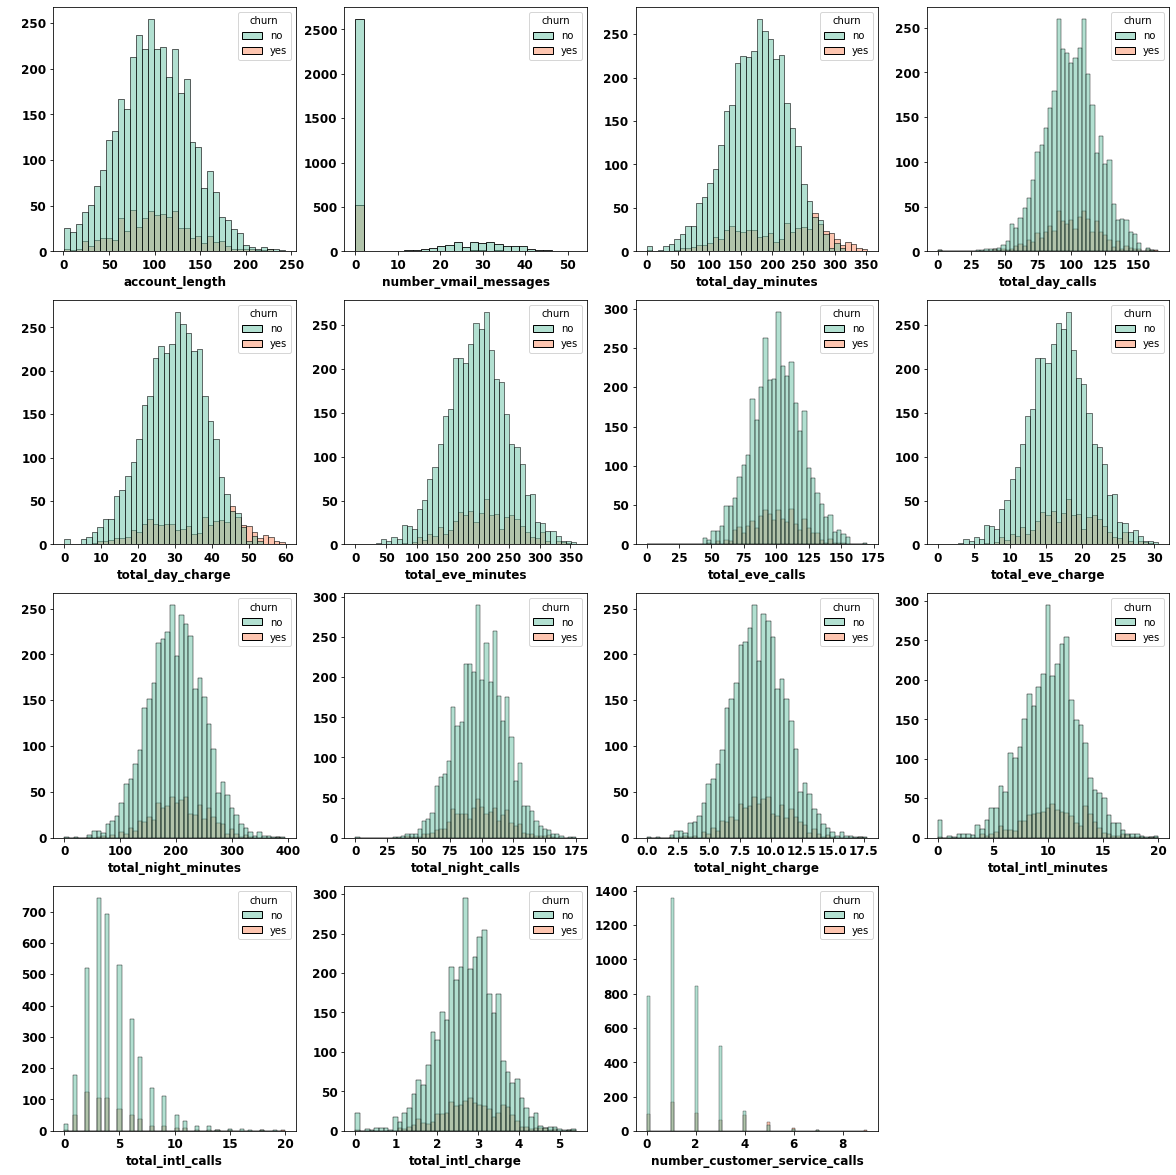

In [3]:
# Histogram data analysis

hist_plots(X, y, 'Set2', figsize=(20, 80))

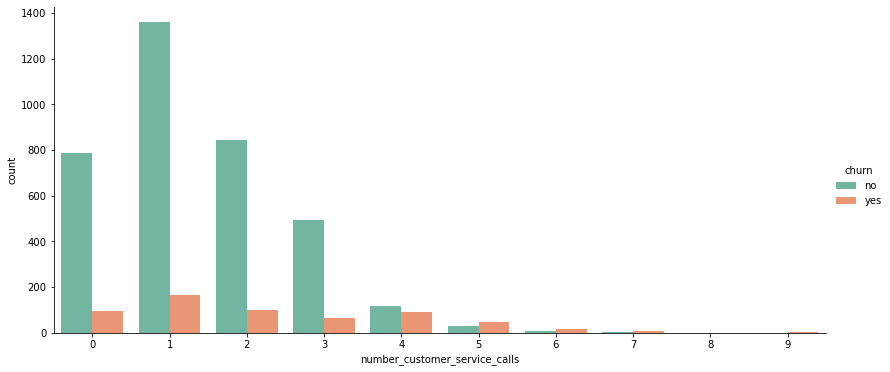

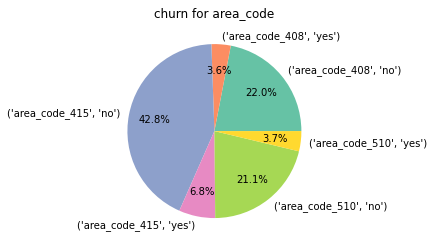

In [4]:
# Categorical data insights

sns.catplot(data = df, x = 'number_customer_service_calls', hue = y.name, kind ='count', palette = 'Set2', height=5.27, aspect=11.7/5.27)
plt.show()
print('\n')
colors = sns.color_palette('Set2')[0:6]
pie_data = df.groupby("area_code")["churn"].value_counts()
labels = pie_data.keys()
plt.pie(x=pie_data, autopct="%.1f%%", labels=labels, colors = colors, pctdistance=0.7)
plt.title('churn for area_code')
plt.show()


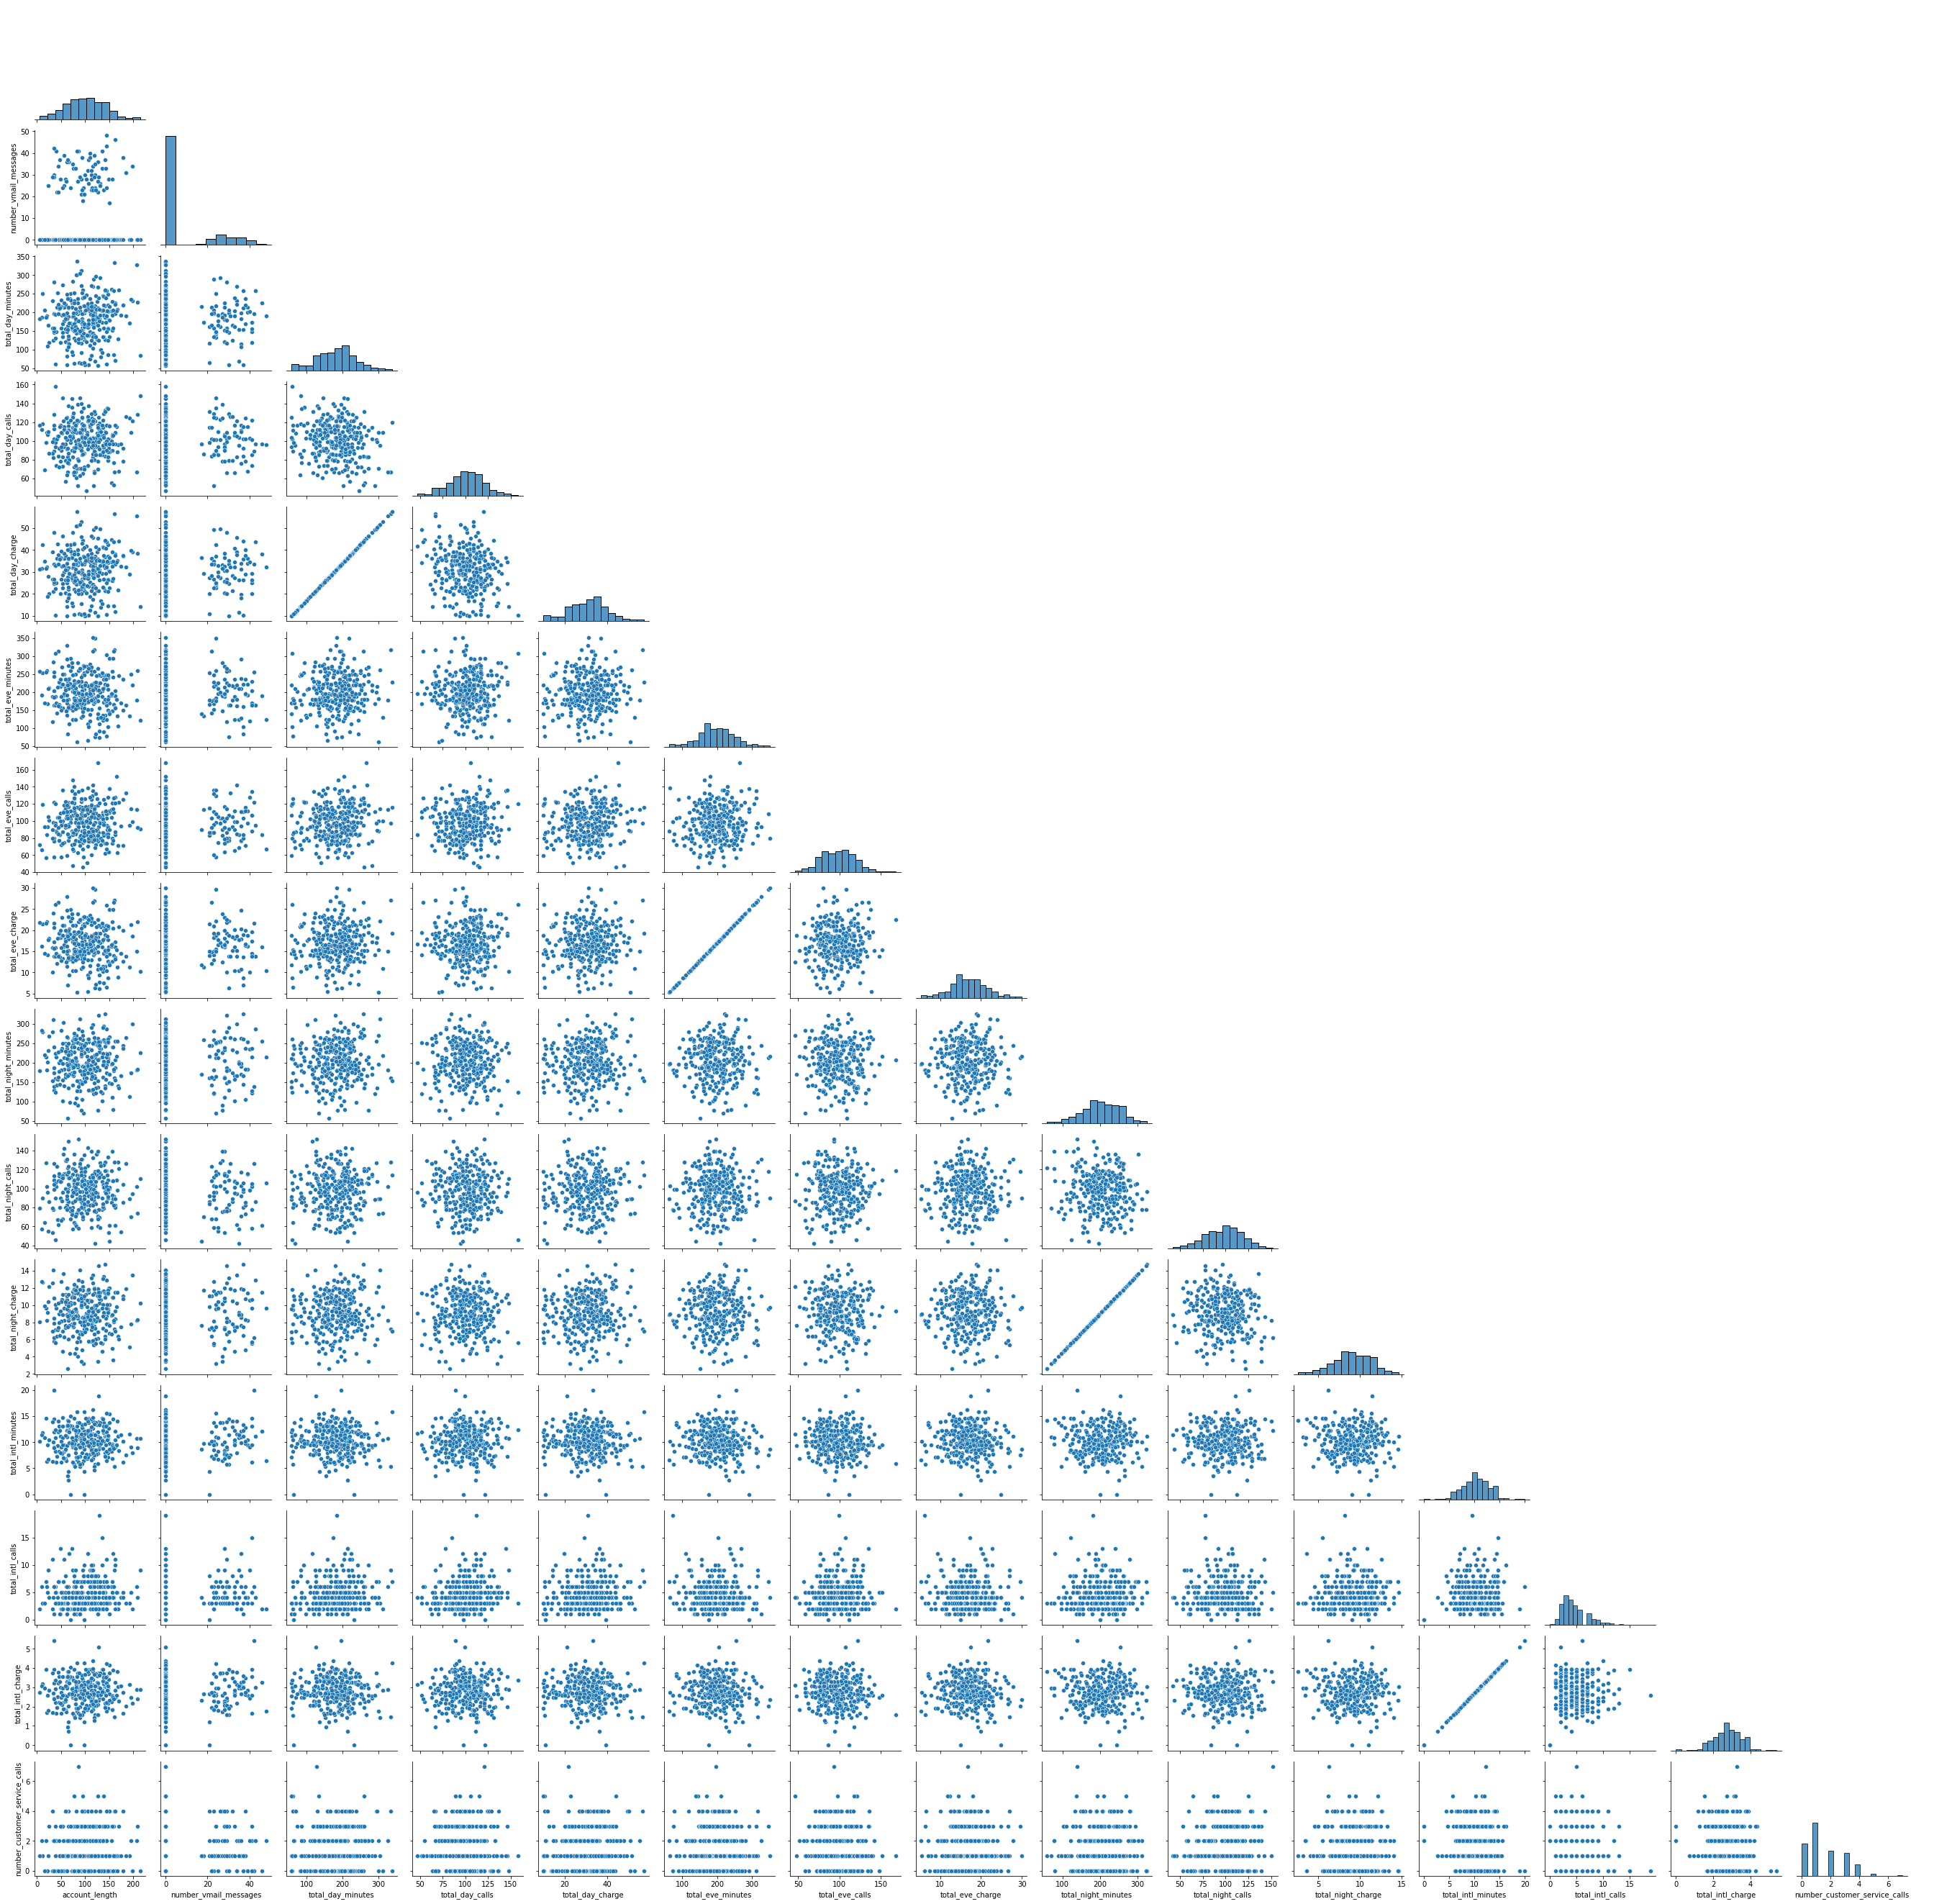

In [5]:
# Scatterplots denote linear correlations between charge and minutes features

subset = X.iloc[:300, :]
pair_grid(subset, hue_str = None, str_palette = None, diag_map = sns.histplot, off_diag_map = sns.scatterplot, 
          bool_diag_sharey='True', bool_corner= 'False' )
plt.show()

#### Summary statistics

In [6]:
location(X)

,([mode][count]),median,mean
state,"([WV], [139])",-,-
account_length,"([90], [53])",100.0,100.24
area_code,"([area_code_415], [2108])",-,-
international_plan,"([no], [3854])",-,-
voice_mail_plan,"([no], [3138])",-,-
number_vmail_messages,"([0], [3139])",0.0,7.63
total_day_minutes,"([189.3], [10])",180.45,180.26
total_day_calls,"([105], [101])",100.0,99.91
total_day_charge,"([32.18], [10])",30.68,30.64
total_eve_minutes,"([230.9], [10])",200.7,200.17


## Processing (transform into numerical values) & Missing Data Handling

In [7]:
X.isna().any() # NaN detecting

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
dtype: bool

In [8]:
# convert churn (target) into numerical values

y.unique()
get_replace(y, ["no", "yes"], [0, 1])

### Data transformation & feature selection

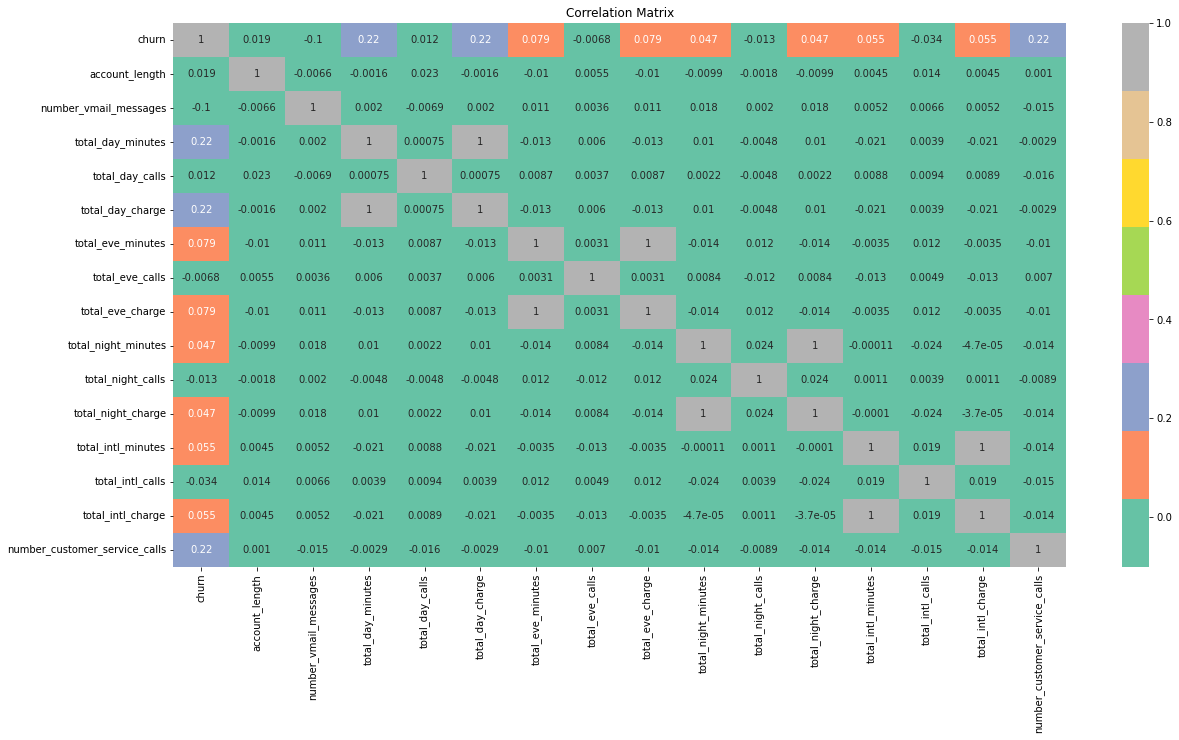

In [9]:
plot_correlation_matrix(X, y, bool_mask = False, colors = 'Set2')

In [10]:
# area_code

X['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [11]:
# -> transform into numerical values

X['area_code'] = get_str_to_num(X['area_code'])

In [12]:
# state

X = X.drop('state', axis=1)

In [13]:
# One hot encoding of plan features

plans = ['international_plan', 'voice_mail_plan']

for i in plans:
    X = ohe_dummies(X, i)
    X = X.drop([i + '_no'], axis=1)

In [14]:
# Normalization

features = ['area_code', 'account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
            'total_eve_calls','total_eve_charge',
            'total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls', 'number_customer_service_calls',
            'total_intl_charge','total_eve_minutes','total_night_minutes']

for i in features:
    X[i] = min_max_scaler(X[i])

# Imbalanced Data

0    3652
1     598
Name: churn, dtype: int64

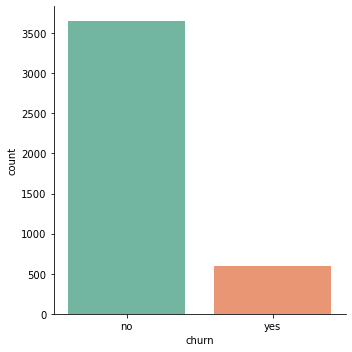

In [15]:
sns.catplot(data=df_raw, x='churn', kind='count', palette = 'Set2')
df['churn'].value_counts()

In [16]:
X.shape

(4250, 18)

In [17]:
# Perfom over-sampling using SMOTE

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape)
print(y_res.shape)

(7304, 18)
(7304,)


In [18]:
X_res.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes
0,0.438017,0.068627,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0,1
1,0.561983,0.068627,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0,0
2,0.342975,0.000000,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,1,0
3,0.305785,0.068627,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,1,0
4,0.495868,1.000000,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333,0,1


# Model evaluation and selection

In [19]:
%%time

# resampled data
X = X_res
y = y_res

random_state = 0
rscv_random_state = None

algorithms = {'knn': KNeighborsClassifier(),
              'lr': LogisticRegression(solver = 'liblinear'), 
              'dt': DecisionTreeClassifier(random_state=random_state),
              'bag': BaggingClassifier(random_state=random_state), 
              'rf': RandomForestClassifier(random_state=random_state), 
              'ab': AdaBoostClassifier(random_state=random_state),
             'gb': GradientBoostingClassifier(random_state=random_state),
             'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

models = ['knn', 'lr', 'dt','bag','rf','ab','gb','xgb']

metrics = ['accuracy']

tuning_method = 'GridSearchCV'
# tuning_method = 'RandomizedSearchCV'

hpars = {'xgb' : {'learning_rate' : [0.1, 0.3], 'reg_lambda' : [0.5 ,1], 'subsample' : [0.9]}} # param_grid for GridSearchCV 

# hpars = {'lr' : dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1']), 
#          'dt' : dict(max_depth=uniform(loc=3, scale=7)), 
#          'xgb' : dict(learning_rate = uniform(loc=0.1, scale=0.5))} # param_distributions for RandomizedSearchCV

n_splits = 6 # KFold_param
shuffle = True # KFold_param

inner_cv = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
outer_cv = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

judge = Judge().set_data(X,y).set_algorithms(algorithms).set_metrics(metrics).set_models(models).set_nested_cv(tuning_method, hpars, inner_cv, outer_cv)
judge.get_table()

Hyper-parameters optimization method: GridSearchCV
Wall time: 1min 47s


,accuracy
Model,
knn,90.14
lr,78.18
dt,93.17
bag,95.25
rf,96.23
ab,89.03
gb,95.04
xgb,97.67


# Production model

In [20]:
# best model: XGBClassifier

base_estimator_prod = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf_prod = GridSearchCV(base_estimator_prod, hpars['xgb']) # best hyperparameters selection
clf_prod.fit(X, y) # X,y -> whole training dataset
clf_prod.best_estimator_

# save the model to disk

filename = 'customer_churn_prod_model.pickle'
pickle.dump(clf_prod, open(filename, 'wb'))

# New Data Testing

In [21]:
# load test.csv

df_test_raw = pd.read_csv('test.csv')
df_test = df_test_raw.copy()
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [22]:
# data test preprocessing (=data training preprocessing) 

X = df_test.drop(['id','state'], axis=1)
X['area_code'] = get_str_to_num(X['area_code'])
plans = ['international_plan', 'voice_mail_plan']

for i in plans:
    X = ohe_dummies(X, i)
    X = X.drop([i + '_no'], axis=1)

    
# Normalization

features = ['area_code','account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge'
            ,'total_eve_calls','total_eve_charge',
            'total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls', 'number_customer_service_calls',
            'total_intl_charge', 'total_night_minutes','total_eve_minutes']

for i in features:
    X[i] = min_max_scaler(X[i])

X.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes
0,0.535865,0.068627,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667,0,1
1,0.493671,1.000000,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000,1,0
2,0.257384,0.068627,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667,0,0
3,0.388186,1.000000,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000,0,0
4,0.729958,0.068627,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000,0,0


In [23]:
# predictions

preds = pd.DataFrame(clf_prod.predict(X)).set_axis(['churn'], axis='columns') # churn preds
get_replace(preds, [0, 1], ["no", "yes"])

# submission csv format for Kaggle

submission = pd.concat([df_test['id'], preds], axis=1)
submission

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,yes
4,5,yes
...,...,...
745,746,no
746,747,yes
747,748,yes
748,749,yes


In [24]:
# write submission.csv

submission.to_csv('submission.csv', index=False)